La arquitectura de software Composite funciona de forma jerarquizada en la manera de tratar sus clases , estableciendo una recursividad en la transferencias de atributos de las clases padres a las clases hijas , utilizando una estructura muy parecida a un arbol.

El problema se basa en una estructura raiz llama Auto la cual tiene  el atributo posicion la cual hereda a la clase Motor el cual compartira tambien este atributo y lo actualizara para moverse toda la clase y subclase en conjunto , esto se heredara recursivamente tambien a los objetos Tuerca y Material.
El auto se inicializa en la posicion cero el cual va avanzando con el motodo mover() utilizado en la clase Auto

Estructura del arbol: 
CompositeA (Vehiculo)   Padre de  CompositeB (Motor),
CompositeB (Motor) Padre de   LeafB (Material) y  LeafA (Tuerca) 
                      
Este codigo ne necesita pre-instalar librerias externas , formato libreta Jupyter , utiliza from abc import ABC, abstractmethod para poder declarar funciones abstracta y from IPython.display import Image para randerizar el diagrama de secuencia del patron de diseño.

Grupo:
Armin Herrera Medel (19.357.754-7) -> armin.herrera@alu.ucm.cl 



Diagrama de secuencia - Patron Composite

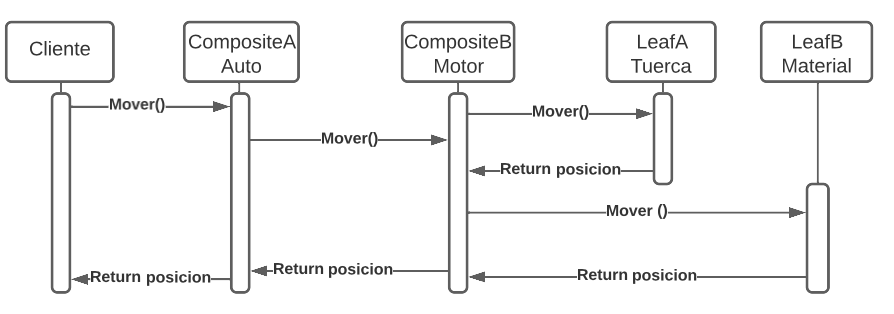

In [71]:
from IPython.display import Image
Image(filename='Diagrama.png', width=700)


In [72]:
from abc import ABC, abstractmethod

# Clase abstracta del componente Auto
class Auto(ABC):
    def __init__(self, año, color):
        self.posicion = 0
        self.año = año
        self.color = color

    @abstractmethod
    def mover(self, distancia):
        pass

# Clase del componente CompositeA - Auto
class CompositeA(Auto):
    def __init__(self, año, color):
        super().__init__(año, color)
        self.componentes = []

    def agregar_componente(self, componente):
        self.componentes.append(componente)
        componente.posicion = self.posicion  # Asignar la posición del padre al componente hijo actualizando, se realiza por si se agregan nuevos hijos para que el atributo posicion sea el mismo
        if isinstance(componente, (CompositeA, CompositeB)):  # Verificar si el componente es un CompositeA o CompositeB
            for subcomponente in componente.componentes: # FOR para solucionar recursividad infinita de herencia del atributo posicion 
                subcomponente.posicion = self.posicion  # Asignar la posición del padre a los subcomponentes
            self.componentes.extend(componente.componentes)  # Agregar los subcomponentes al componente actual


    def quitar_componente(self, componente):
        self.componentes.remove(componente)

    def mover(self, distancia):
        self.posicion += distancia
        for componente in self.componentes:
            componente.mover(distancia)

# Clase del componente CompositeB - Motor
class CompositeB(Auto):
    def __init__(self, año,velocidad_tope):
        super().__init__(año, None)
        self.velocidad_tope = velocidad_tope
        self.componentes = []

    def agregar_componente(self, componente):
        self.componentes.append(componente)
        componente.posicion = self.posicion  # Asignar la posición del padre al componente hijo
        if isinstance(componente, (CompositeA, CompositeB)):  # Verificar si el componente es un CompositeA o CompositeB
            for subcomponente in componente.componentes:
                subcomponente.posicion = self.posicion  # Asignar la posición del padre a los subcomponentes
            self.componentes.extend(componente.componentes)  # Agregar los subcomponentes al componente actual

    def quitar_componente(self, componente):
        self.componentes.remove(componente)

    def mover(self, distancia):
        self.posicion += distancia
        for componente in self.componentes:
            componente.mover(distancia)

# Clase Leaf - Tuerca
class LeafA(Auto):
    def __init__(self, cantidad):
        super().__init__(None, None)  # Año y color no son relevantes para la tuerca
        self.cantidad = cantidad

    def mover(self, distancia):
        self.posicion += distancia

# Clase Leaf - Material
class LeafB(Auto):
    def __init__(self, material):
        super().__init__(None, None)
        self.material = material
    def mover(self, distancia):
        self.posicion += distancia


In [73]:
Vehiculo1 = CompositeA(2023, "Negro")
Vehiculo2 = CompositeA(2022, "Blanco")
Vehiculo3 = CompositeA(2021, "Rojo")
Vehiculo4 = CompositeA(2020, "Amarillo")
Vehiculo5 = CompositeA(2019, "Cafe")
Vehiculo6 = CompositeA(2018, "Negro")
Vehiculo7 = CompositeA(2017, "Azul")

In [74]:
Motor1 = CompositeB(2023, 180)
Motor2 = CompositeB(2022, 200)
Motor3 = CompositeB(2021, 210)
Motor4 = CompositeB(2020, 200)
Motor5 = CompositeB(2019, 190)
Motor6 = CompositeB(2018, 205)
Motor7 = CompositeB(2017, 215)


In [75]:
Tuerca1 = LeafA(12)
Tuerca2 = LeafA(15)
Tuerca3 = LeafA(7)
Tuerca4 = LeafA(5)
Tuerca5 = LeafA(7)
Tuerca6 = LeafA(15)
Tuerca7 = LeafA(20)

In [76]:
Material1 = LeafB("Hierro")
Material2 = LeafB("Aluminio")
Material3 = LeafB("Cobre")
Material4 = LeafB("Cobre")
Material5 = LeafB("Aluminio")
Material6 = LeafB("Cobre")
Material7 = LeafB("Plastico")

In [77]:
Vehiculo1.agregar_componente(Motor1)
Vehiculo2.agregar_componente(Motor2)
Vehiculo3.agregar_componente(Motor3)
Vehiculo4.agregar_componente(Motor4)
Vehiculo5.agregar_componente(Motor5)
Vehiculo6.agregar_componente(Motor6)
Vehiculo7.agregar_componente(Motor7)

In [78]:
Motor1.agregar_componente(Tuerca1)
Motor2.agregar_componente(Tuerca2)
Motor3.agregar_componente(Tuerca3)
Motor4.agregar_componente(Tuerca4)
Motor5.agregar_componente(Tuerca5)
Motor6.agregar_componente(Tuerca6)
Motor7.agregar_componente(Tuerca7)

In [79]:
Motor1.agregar_componente(Material1)
Motor2.agregar_componente(Material2)
Motor3.agregar_componente(Material3)
Motor4.agregar_componente(Material4)
Motor5.agregar_componente(Material5)
Motor6.agregar_componente(Material6)
Motor7.agregar_componente(Material7)

In [80]:
Vehiculo1.mover(50)
Vehiculo2.mover(100)
Vehiculo3.mover(120)
Vehiculo4.mover(70)
Vehiculo5.mover(55)
Vehiculo6.mover(75)
Vehiculo7.mover(110)

In [84]:
print("Vehiculo 1 con posicion: " + str(Vehiculo1.posicion) + " Con su motor en la posicion: " + str(Motor1.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca1.posicion)+ " con su material en la posicion: "+ str(Material1.posicion))
print("Vehiculo 2 con posicion: " + str(Vehiculo2.posicion) + " Con su motor en la posicion: " + str(Motor2.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca2.posicion)+ " con su material en la posicion: "+ str(Material2.posicion))
print("Vehiculo 3 con posicion: " + str(Vehiculo3.posicion) + " Con su motor en la posicion: " + str(Motor3.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca3.posicion)+ " con su material en la posicion: "+ str(Material3.posicion))
print("Vehiculo 4 con posicion: " + str(Vehiculo4.posicion) + " Con su motor en la posicion: " + str(Motor4.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca4.posicion)+ " con su material en la posicion: "+ str(Material5.posicion))
print("Vehiculo 5 con posicion: " + str(Vehiculo5.posicion) + " Con su motor en la posicion: " + str(Motor5.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca5.posicion)+ " con su material en la posicion: "+ str(Material5.posicion))
print("Vehiculo 6 con posicion: " + str(Vehiculo6.posicion) + " Con su motor en la posicion: " + str(Motor6.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca6.posicion)+ " con su material en la posicion: "+ str(Material6.posicion))
print("Vehiculo 7 con posicion: " + str(Vehiculo7.posicion) + " Con su motor en la posicion: " + str(Motor7.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca7.posicion)+ " con su material en la posicion: "+ str(Material7.posicion))

Vehiculo 1 con posicion: 50 Con su motor en la posicion: 50 Con las tuercas del motor en la posicion: 50 con su material en la posicion: 50
Vehiculo 2 con posicion: 100 Con su motor en la posicion: 100 Con las tuercas del motor en la posicion: 100 con su material en la posicion: 100
Vehiculo 3 con posicion: 120 Con su motor en la posicion: 120 Con las tuercas del motor en la posicion: 120 con su material en la posicion: 120
Vehiculo 4 con posicion: 70 Con su motor en la posicion: 70 Con las tuercas del motor en la posicion: 70 con su material en la posicion: 55
Vehiculo 5 con posicion: 55 Con su motor en la posicion: 55 Con las tuercas del motor en la posicion: 55 con su material en la posicion: 55
Vehiculo 6 con posicion: 75 Con su motor en la posicion: 75 Con las tuercas del motor en la posicion: 75 con su material en la posicion: 75
Vehiculo 7 con posicion: 110 Con su motor en la posicion: 110 Con las tuercas del motor en la posicion: 110 con su material en la posicion: 110


Luego para comprobar la herencia del atributo posicion haremos que solo el vehiculo 2,5,6 7 se muevan 100 mas

In [85]:
Vehiculo2.mover(100)
Vehiculo5.mover(100)
Vehiculo6.mover(100)
Vehiculo7.mover(100)

In [86]:
print("Vehiculo 1 con posicion: " + str(Vehiculo1.posicion) + " Con su motor en la posicion: " + str(Motor1.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca1.posicion)+ " con su material en la posicion: "+ str(Material1.posicion))
print("Vehiculo 2 con posicion: " + str(Vehiculo2.posicion) + " Con su motor en la posicion: " + str(Motor2.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca2.posicion)+ " con su material en la posicion: "+ str(Material2.posicion))
print("Vehiculo 3 con posicion: " + str(Vehiculo3.posicion) + " Con su motor en la posicion: " + str(Motor3.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca3.posicion)+ " con su material en la posicion: "+ str(Material3.posicion))
print("Vehiculo 4 con posicion: " + str(Vehiculo4.posicion) + " Con su motor en la posicion: " + str(Motor4.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca4.posicion)+ " con su material en la posicion: "+ str(Material5.posicion))
print("Vehiculo 5 con posicion: " + str(Vehiculo5.posicion) + " Con su motor en la posicion: " + str(Motor5.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca5.posicion)+ " con su material en la posicion: "+ str(Material5.posicion))
print("Vehiculo 6 con posicion: " + str(Vehiculo6.posicion) + " Con su motor en la posicion: " + str(Motor6.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca6.posicion)+ " con su material en la posicion: "+ str(Material6.posicion))
print("Vehiculo 7 con posicion: " + str(Vehiculo7.posicion) + " Con su motor en la posicion: " + str(Motor7.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca7.posicion)+ " con su material en la posicion: "+ str(Material7.posicion))

Vehiculo 1 con posicion: 50 Con su motor en la posicion: 50 Con las tuercas del motor en la posicion: 50 con su material en la posicion: 50
Vehiculo 2 con posicion: 200 Con su motor en la posicion: 200 Con las tuercas del motor en la posicion: 200 con su material en la posicion: 200
Vehiculo 3 con posicion: 120 Con su motor en la posicion: 120 Con las tuercas del motor en la posicion: 120 con su material en la posicion: 120
Vehiculo 4 con posicion: 70 Con su motor en la posicion: 70 Con las tuercas del motor en la posicion: 70 con su material en la posicion: 155
Vehiculo 5 con posicion: 155 Con su motor en la posicion: 155 Con las tuercas del motor en la posicion: 155 con su material en la posicion: 155
Vehiculo 6 con posicion: 175 Con su motor en la posicion: 175 Con las tuercas del motor en la posicion: 175 con su material en la posicion: 175
Vehiculo 7 con posicion: 210 Con su motor en la posicion: 210 Con las tuercas del motor en la posicion: 210 con su material en la posicion: 210

Luego le agregaremos una nueva tuerca al vehiculo 1 que ya esta en la posicion 50 y usaremos mover()

In [87]:
Tuerca8 = LeafA(10)
Motor7.agregar_componente(Tuerca8)
Vehiculo7.mover(50)

In [90]:
print("Vehiculo 7 con posicion: " + str(Vehiculo7.posicion) + " Con su motor en la posicion: " + str(Motor7.posicion) + " Con las tuercas del motor en la posicion: " + str(Tuerca7.posicion)+ " SEGUNDO SET DE TUERCAS " + str(Tuerca8.posicion)+ " con su material en la posicion: "+ str(Material7.posicion))

Vehiculo 7 con posicion: 260 Con su motor en la posicion: 260 Con las tuercas del motor en la posicion: 260 SEGUNDO SET DE TUERCAS 260 con su material en la posicion: 260


Conclusion: Encontramos que la solucion al problema utilizando el patron de diseño composite satiface el requerimiento de mantener la posicion de la clase Auto incluso al agregar piezas nuevas a este como las tuercas.